In [15]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct  9 01:59:56 2019

@author: Adil
"""

import dlib
import numpy as np
import time
import face_recognition
import os
from PIL import Image
from matplotlib import pyplot as plt

def get_face_embeddings_from_image(image, convert_to_rgb=False):
   
    if convert_to_rgb:
        image = image[:, :, ::-1]
    face_locations = face_recognition.face_locations(image)
    face_encodings = face_recognition.face_encodings(image, face_locations)
    return face_locations, face_encodings

class Pic:
    
    def __init__(self,path):
        self.path = path
        self.comparisons={}
        
    def load(self):
        self.img = face_recognition.load_image_file(path)
        
    def embed(self):
        self.locations,self.embedding=get_face_embeddings_from_image(self.img)
    
    def compare(self,other):
        comparison=face_recognition.face_distance(other.embedding,self.embedding[0])
        print('{0:<20}{1:<20}{2:>10}'.format(self.path,other.path,str(comparison[0])))
        self.comparisons[other.path]=comparison[0]
    
    def anchor(self):
        self.anchors = face_recognition.face_landmarks(self.img,self.locations)  
    
    def plot(self,ax):
        anchor = self.anchors[0]      
        for key in anchor.keys():
            for pair in anchor[key]:
                ax.plot(pair[0],-pair[1],'o', color='black')
                ax.set_title(self.path)
    
    def display(self):
        image=face_recognition.load_image_file(self.path)
        top, right, bottom, left = self.locations[0]
        face_image = image[top:bottom, left:right]
        pil_image = Image.fromarray(face_image)
        print(top, right, bottom, left)
        pil_image.show()
        

In [16]:
# For each pic in dir: instantiate, load, embed and anchor

image_dir = ('./image_dir')
paths = os.listdir(image_dir)

pictures  = []

for k,path in enumerate(paths):
    pictures.append(Pic(path))
    pictures[-1].load()    
    pictures[-1].embed()
    pictures[-1].anchor()


In [17]:
# Compare each picture to all others

print('{0:<20}{1:<20}{2:>10}'.format('PictureA','PictureB','VectorDistance'))

num = len(pictures)

for i in range(num):    
    for j in range(num):
        pictures[i].compare(pictures[j])
        

PictureA            PictureB            VectorDistance
dt1.jpg             dt1.jpg                    0.0
dt1.jpg             kk1.jpg             0.7849338793765491
dt1.jpg             kk2.jpg             0.8149979452891201
kk1.jpg             dt1.jpg             0.7849338793765491
kk1.jpg             kk1.jpg                    0.0
kk1.jpg             kk2.jpg             0.3400226363607682
kk2.jpg             dt1.jpg             0.8149979452891201
kk2.jpg             kk1.jpg             0.3400226363607682
kk2.jpg             kk2.jpg                    0.0


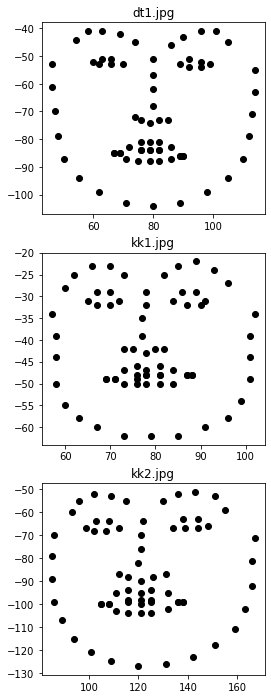

In [18]:
# Plot facial features

fig, axes = plt.subplots(num,figsize=(4,4*num))

for i in range(num):
    pictures[i].plot(axes[i])
    